<a href="https://colab.research.google.com/github/Medouchene/Deep-Learning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
##########################
### DATASET
##########################
from google.colab import drive
drive.mount('/content/drive')
data = np.genfromtxt('/content/drive/MyDrive/Colab_Notebooks/perceptron_toydata.txt', delimiter='\t')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]
print("nchof : ", X[shuffle_idx])

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)
nchof :  [[ 2.95  2.09]
 [-3.33 -0.44]
 [ 3.87  2.91]
 [ 1.59  1.25]
 [-1.64 -1.96]
 [ 0.39 -1.99]
 [ 0.77 -1.14]
 [-2.94 -4.47]
 [ 1.36  2.68]
 [ 1.56  3.85]
 [-2.59 -2.21]
 [-5.27 -0.78]
 [ 2.3   3.33]
 [-1.48 -1.17]
 [-2.84 -4.12]
 [-1.14 -2.66]
 [ 0.9   2.05]
 [ 1.31  1.85]
 [-2.64 -2.2 ]
 [-1.69  0.8 ]
 [ 0.97  2.68]
 [ 1.96  0.83]
 [ 1.93  3.71]
 [-1.05 -3.85]
 [ 1.65  0.63]
 [-1.45 -2.26]
 [ 1.5   3.93]
 [-1.84 -1.13]
 [-2.26  0.01]
 [ 1.54  2.02]
 [ 1.2   1.31]
 [-1.41 -0.33]
 [ 2.4   0.91]
 [-0.37 -1.91]
 [ 2.58  1.79]
 [ 3.13  0.92]
 [ 1.73  2.8 ]
 [-2.19 -1.48]
 [ 0.02 -0.02]
 [ 1.26  1.17]
 [-0.68 -1.52]
 [-2.95 -1.16]
 [ 2.52  1.83]
 [-0.05 -1.95]
 [ 0.51  2.44]
 [-1.08 -1.23]
 [ 1.23  2.54]
 [-2.14 -1.62]
 [-3.96 -2.  ]
 [-0.63 -1.53]
 [ 1.9   1.34]
 [ 2.92  2.32]
 [-2.42 -3.35]
 [ 0.68  1.54]
 [-1.5   0.34]
 [ 2.63  0.4 ]
 [-4.09  1.03]
 [-0.33  1.44]
 [-1.74 -1.1 ]
 [ 2.61  2.92]
 [ 0.38  0.95]
 [ 2.86  1.35]

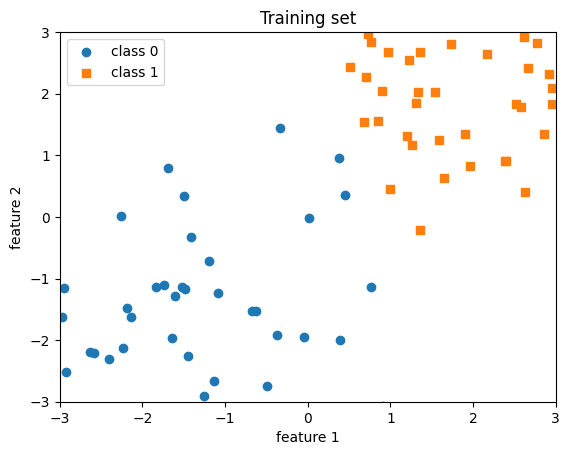

In [13]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [27]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=float)
        self.bias = np.zeros(1, dtype=float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [29]:
all_biases = []
all_weights = []


ppn = Perceptron(num_features=2)

acc = 0

for epoch in range(10):

    for i in range(X.shape[0]):

        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        ppn.train(X[i].reshape(1, -1), y[i].reshape(-1), epochs=1)

        acc = ppn.evaluate(X, y)

        if acc == 1.0:
            break

    if acc == 1.0:
        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        break

<ipython-input-36-758aad88ec9d>:22: RuntimeWarning: invalid value encountered in divide
  y_min = ( (-(w[0] * x_min) - b[0])
<ipython-input-36-758aad88ec9d>:26: RuntimeWarning: invalid value encountered in divide
  y_max = ( (-(w[0] * x_max) - b[0])
<ipython-input-36-758aad88ec9d>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


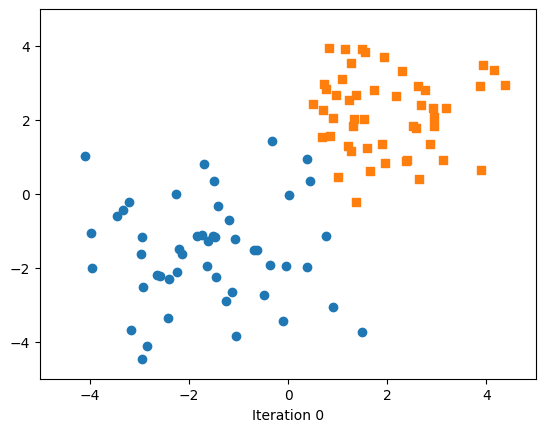

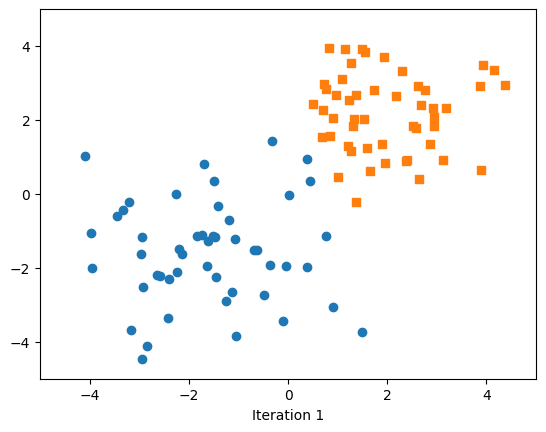

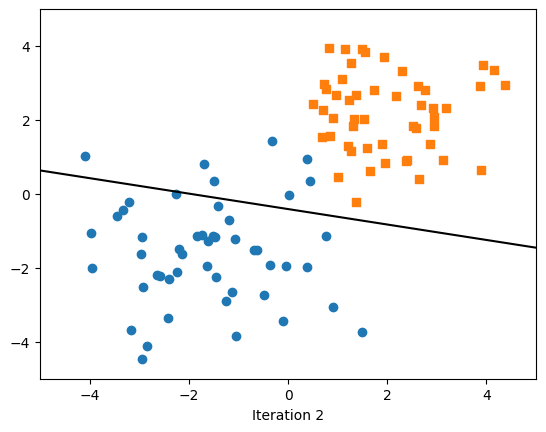

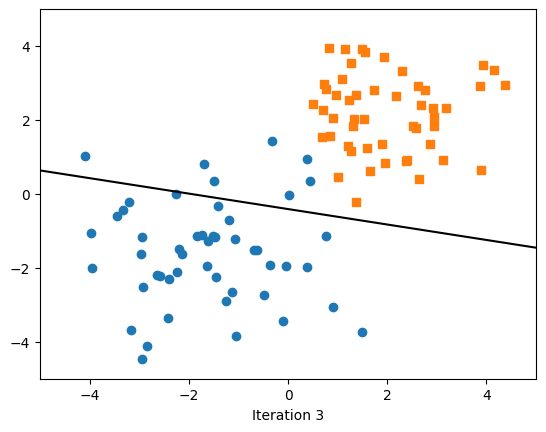

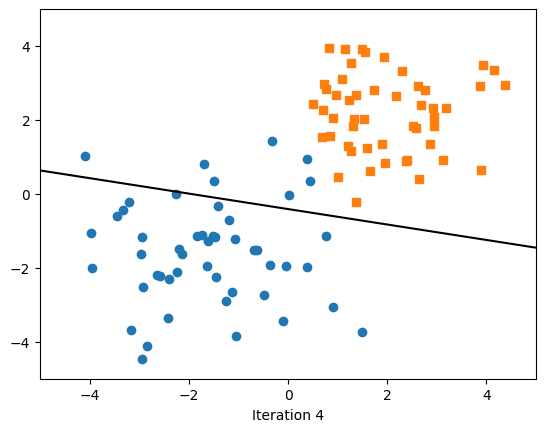

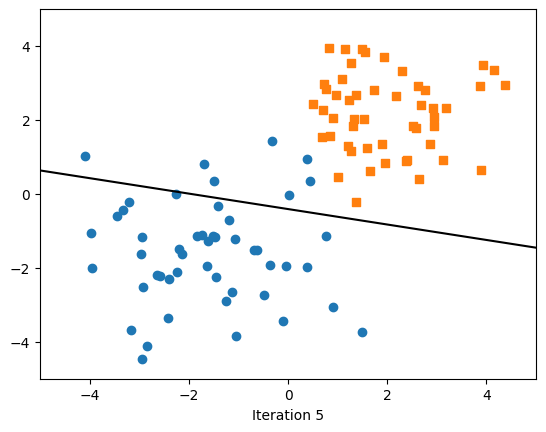

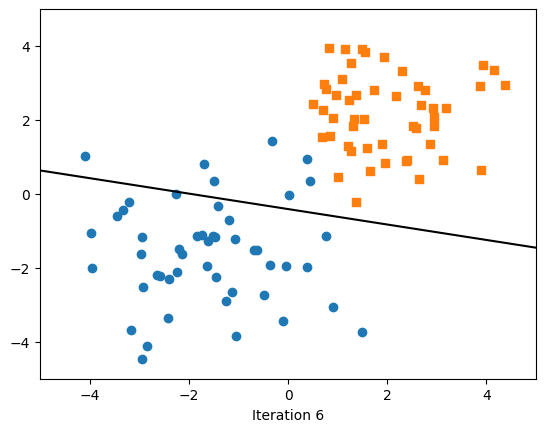

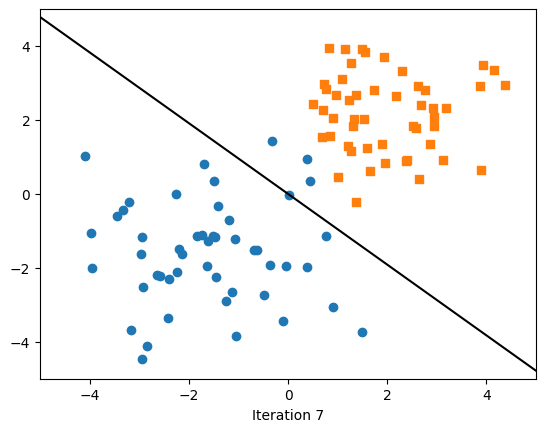

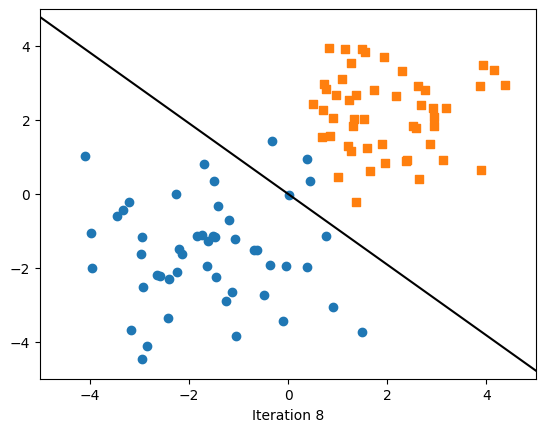

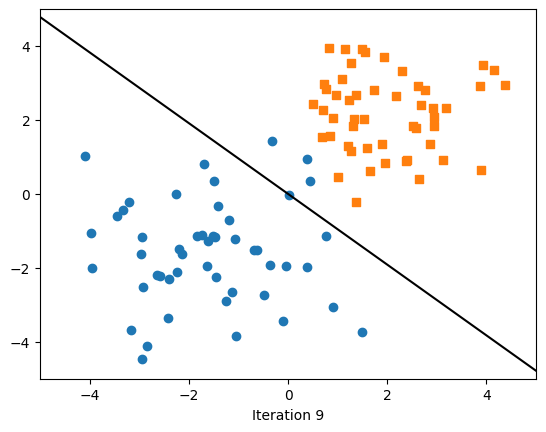

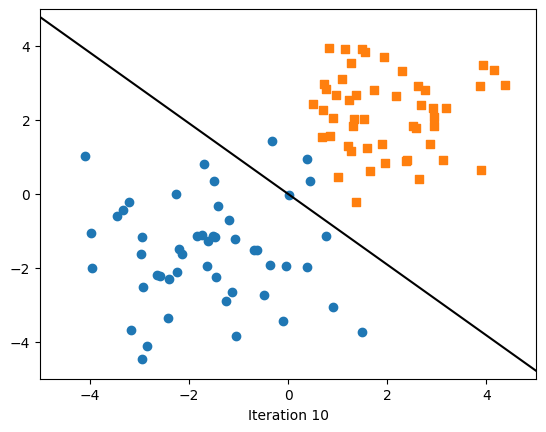

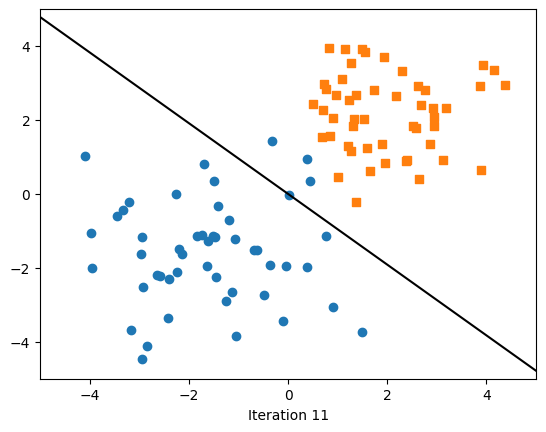

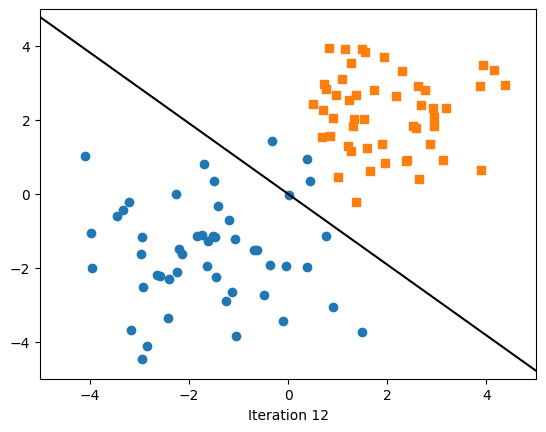

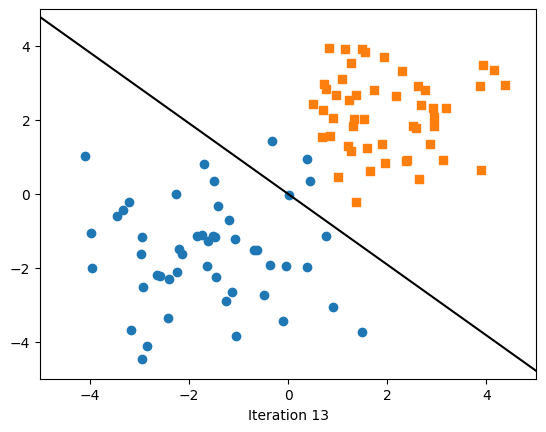

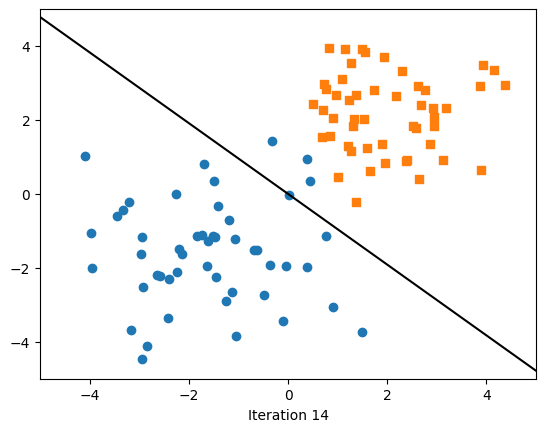

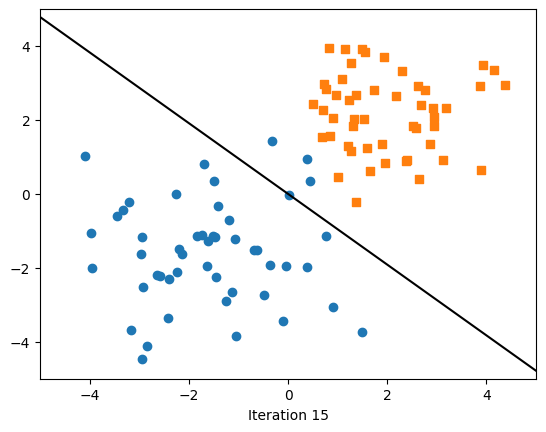

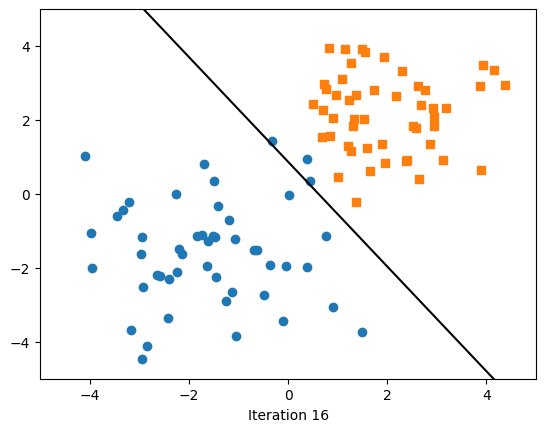

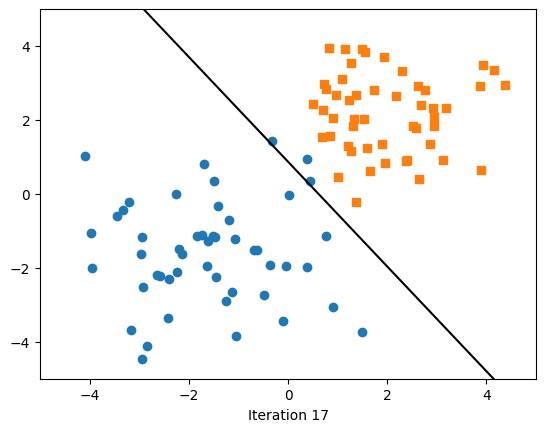

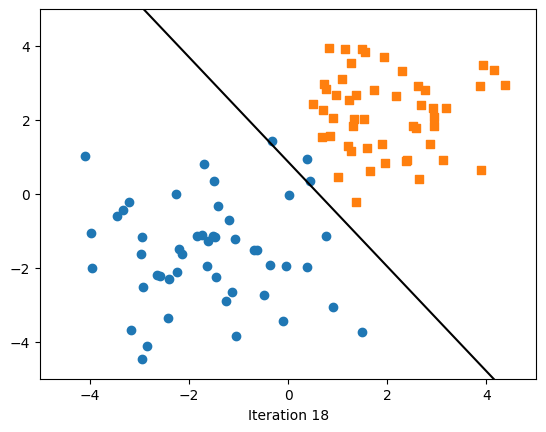

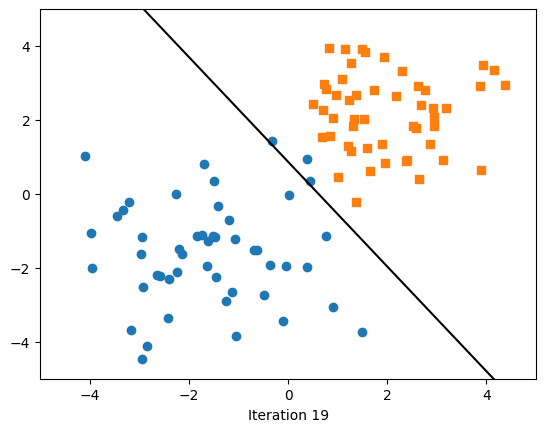

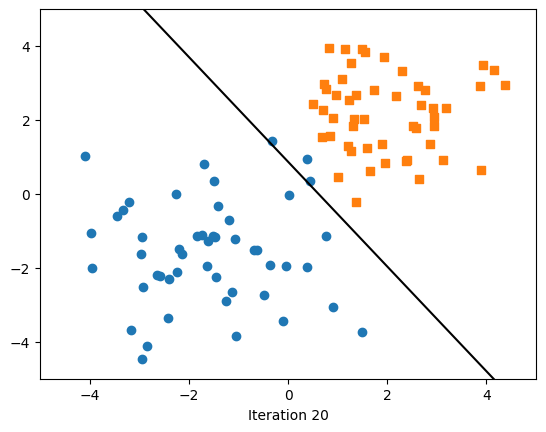

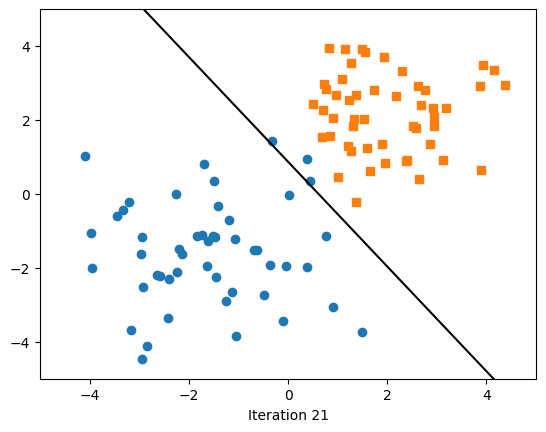

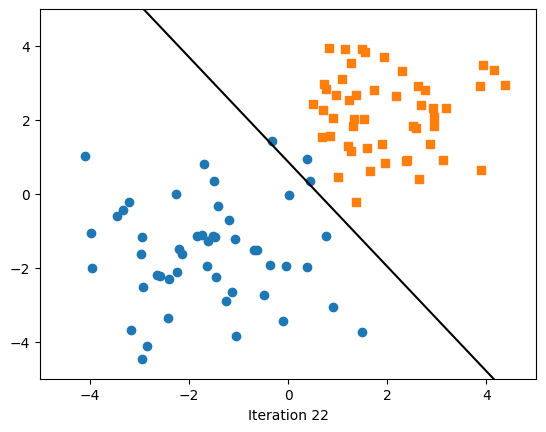

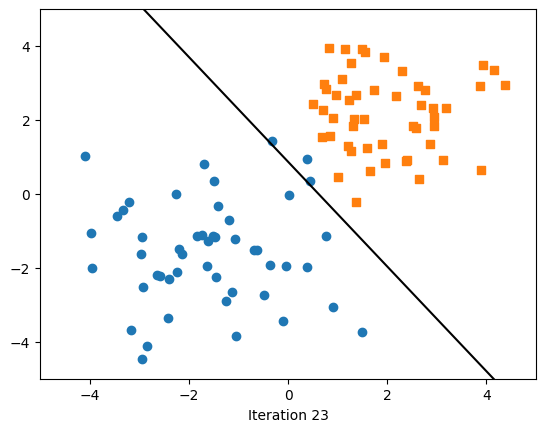

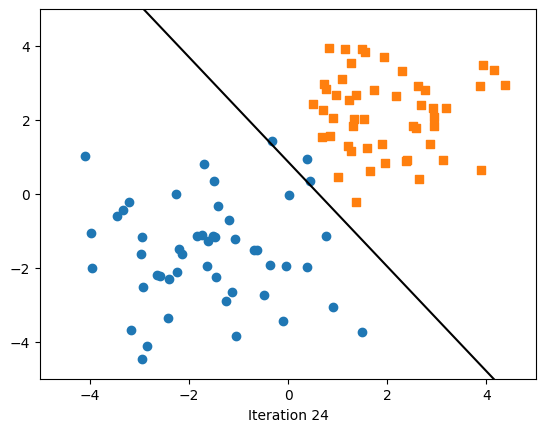

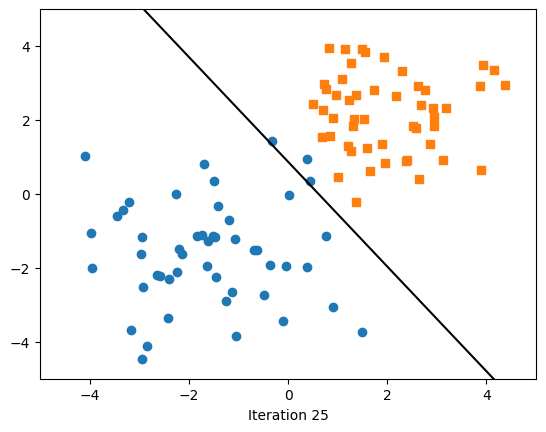

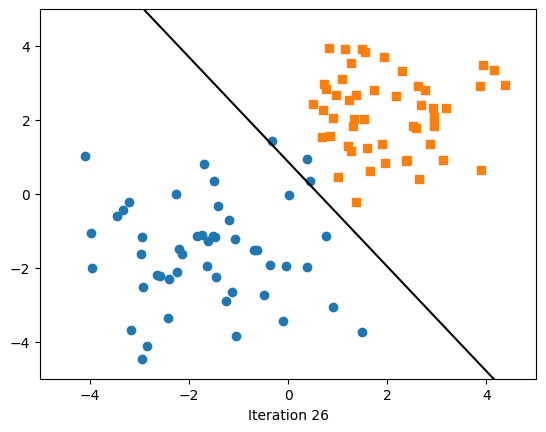

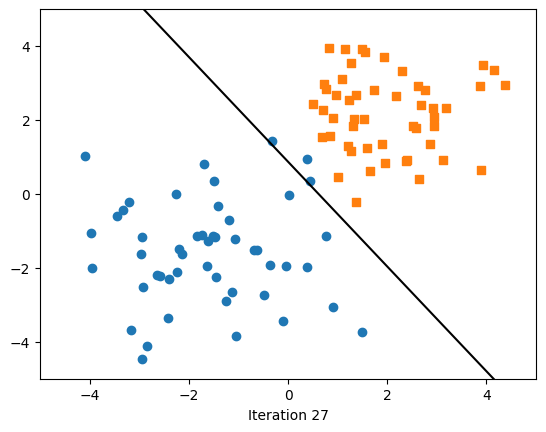

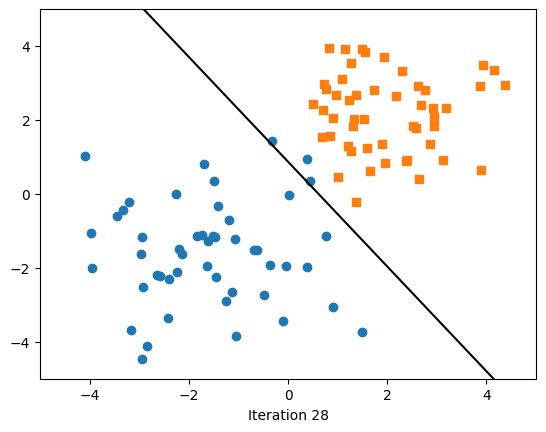

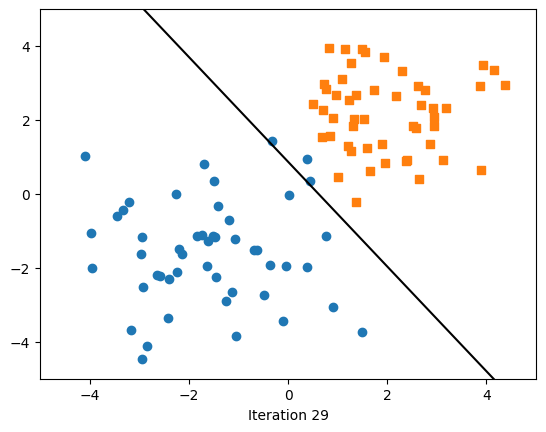

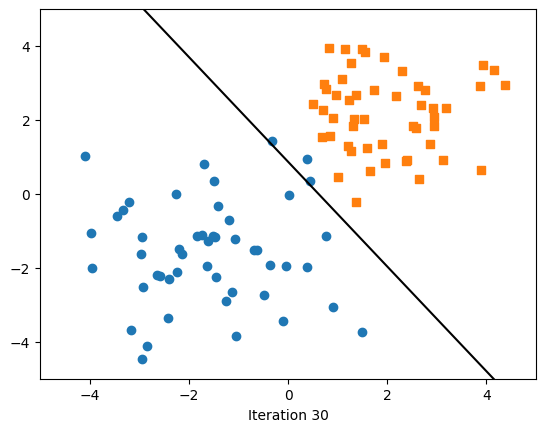

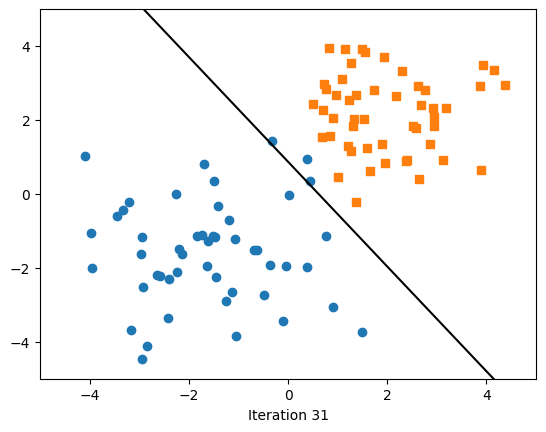

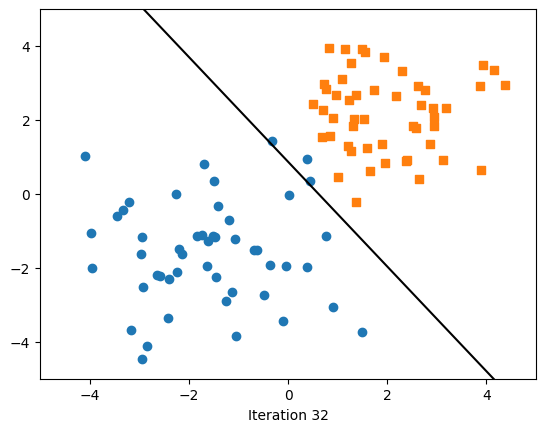

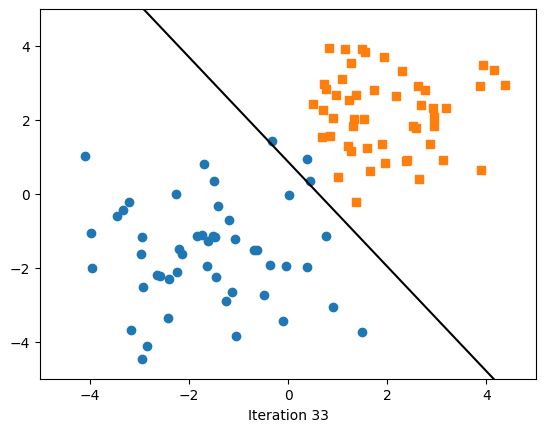

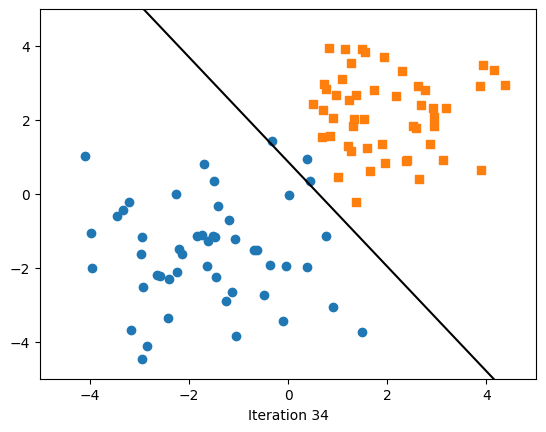

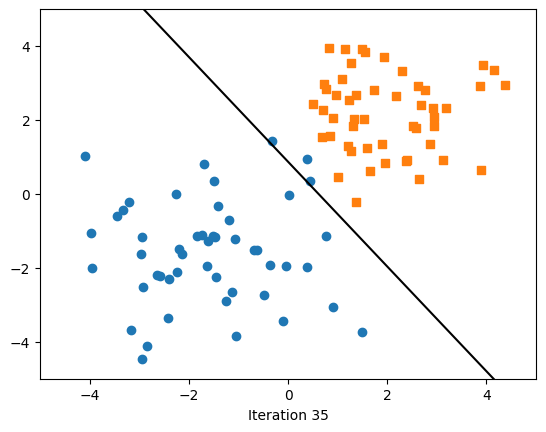

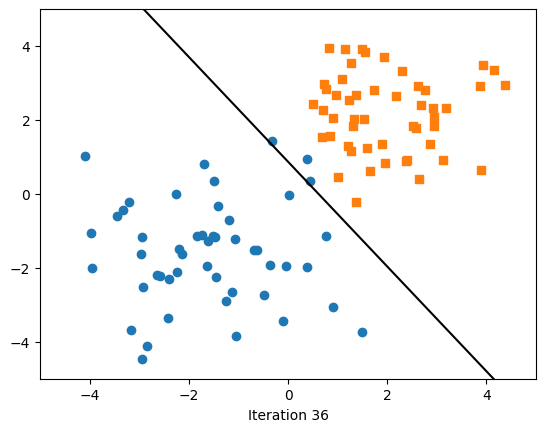

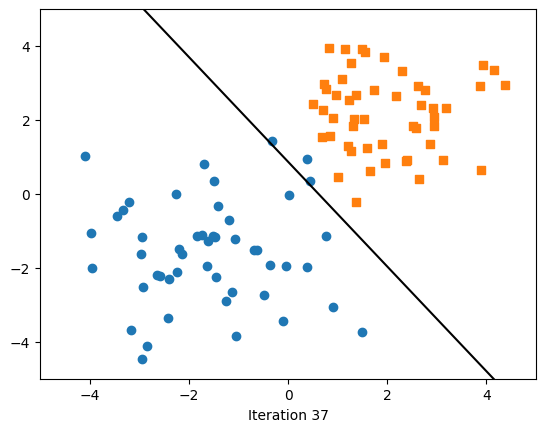

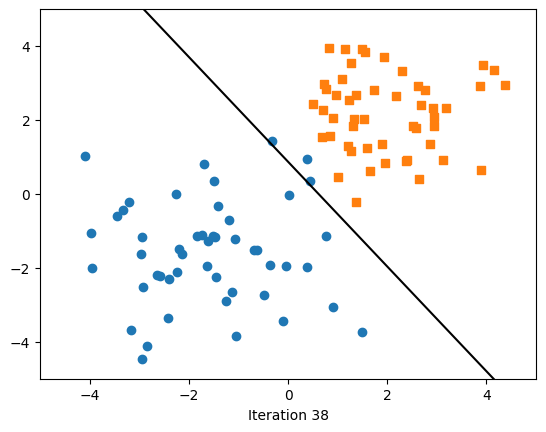

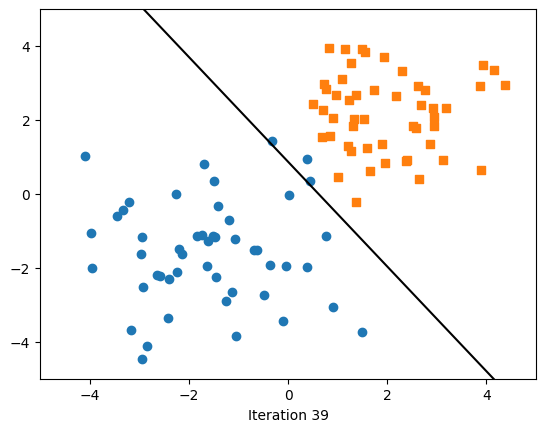

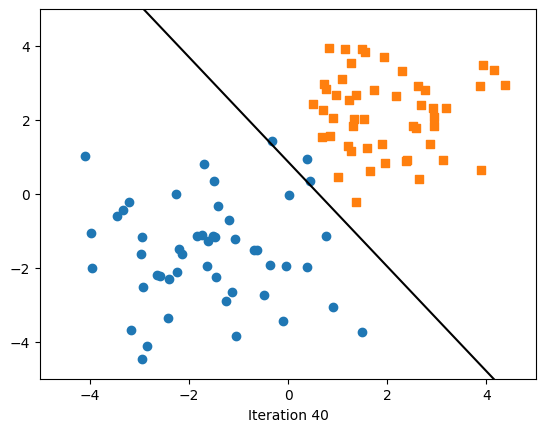

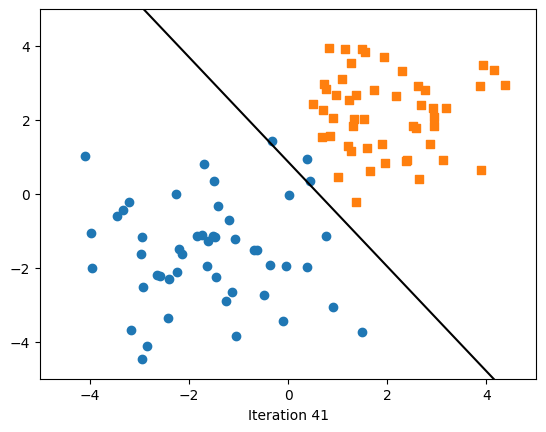

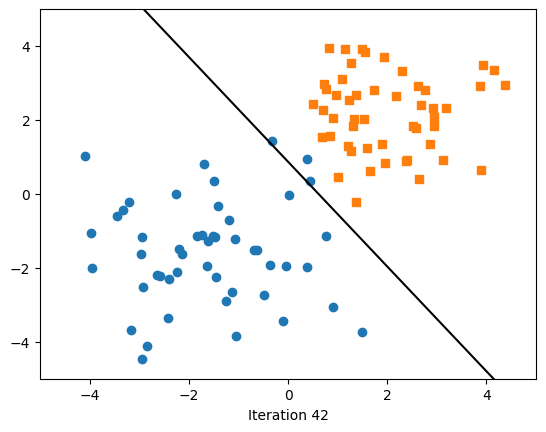

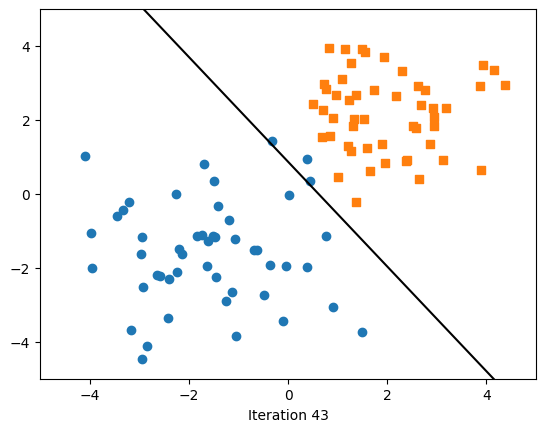

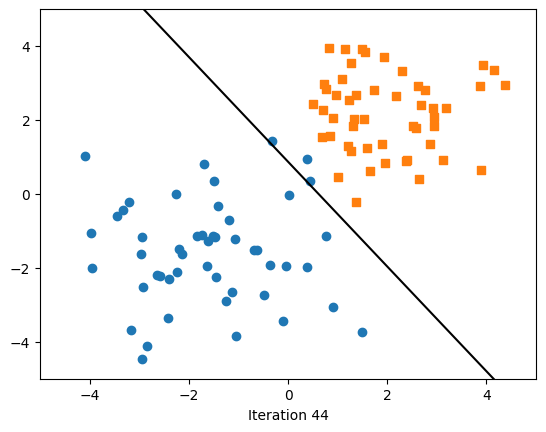

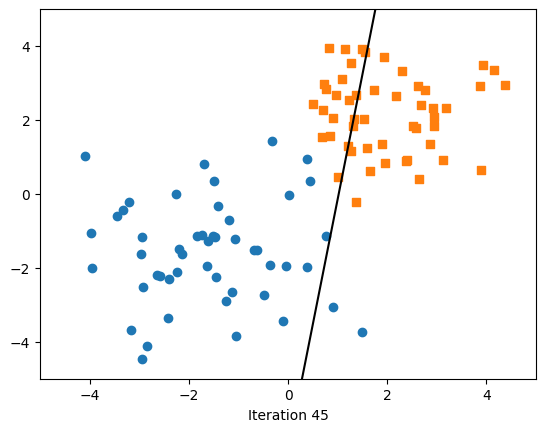

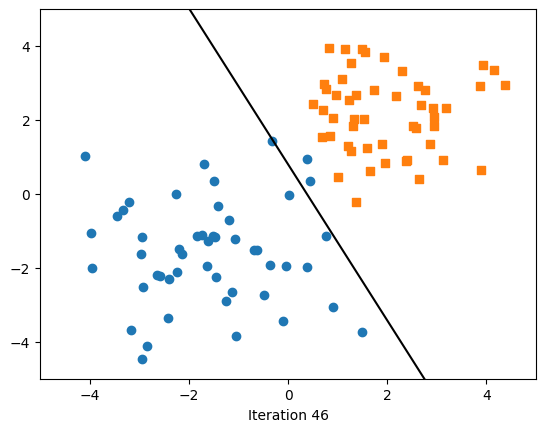

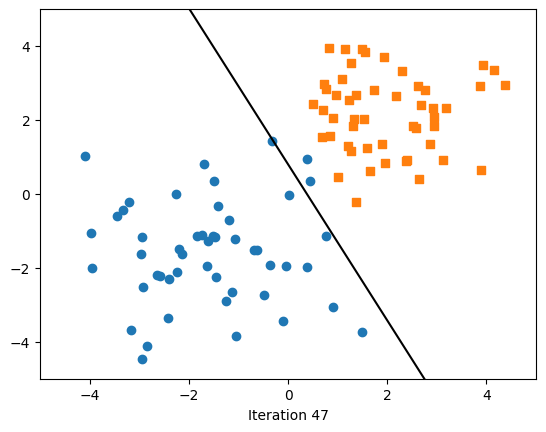

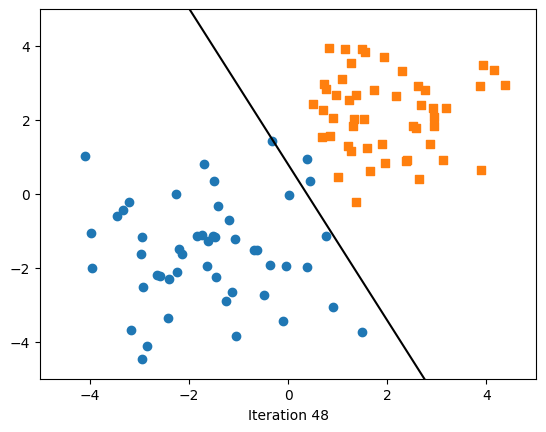

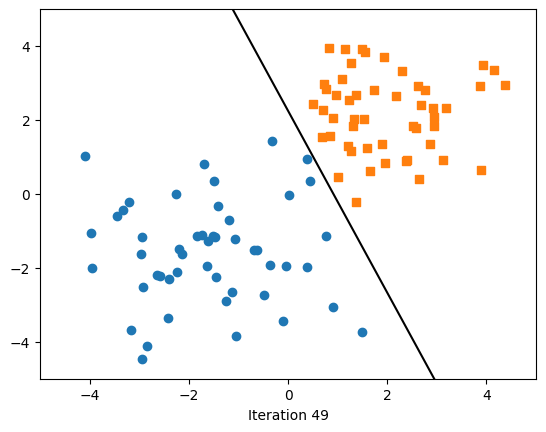

In [36]:
##########################
### 2D Decision Boundary
##########################


import imageio


scatter_highlight_defaults = {'c': '',
                              'edgecolor': 'k',
                              'alpha': 1.0,
                              'linewidths': 2,
                              'marker': 'o',
                              's': 150}

def plot(i):

    fig, ax = plt.subplots()
    w, b = all_weights[i], all_biases[i]

    x_min = -20
    y_min = ( (-(w[0] * x_min) - b[0])
              / w[1] )

    x_max = 20
    y_max = ( (-(w[0] * x_max) - b[0])
              / w[1] )

    ax.set_xlim([-5., 5])
    ax.set_ylim([-5., 5])

    ax.set_xlabel('Iteration %d' % i)

    ax.plot([x_min, x_max], [y_min, y_max], color='k')

    ax.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
    ax.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')

    ax.scatter(X[i][0], X[i][1])

    fig.canvas.draw();
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image


kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('training.gif', [plot(i) for i in range(len(all_weights))], fps=1);